### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 18-Feb-25     

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [62]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-02-19 10:58:08


### Code Information
we are running clustering on dataset with the following fine-tunes:
- preprocessing: convert to lowercase
- preprocessing: stop-words are not removed
- preprocessing: stemming is applied
- preprocessing: unigram tokenization
- vetorization: BOW countvectorizer, term presence
- clustering: k-means with k = 5, 9, 13

In [63]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [64]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')

# vectorization: BOW
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# vectorization: LSA
from sklearn.decomposition import TruncatedSVD

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [65]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [66]:
with open('dataset/news_Feb_14.csv','r',encoding="utf8") as f:
    documents = f.readlines()
f.close()

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-02-19 10:58:08


['\ufefftitle,date\n',
 'ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank,14/02/2025\n',
 '"Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO",14/02/2025\n',
 '"India, US agree to resolve trade and tariff rows after Trump-Modi talks",14/02/2025\n',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief,14/02/2025\n',
 '"HBL, S&P Global launch Pakistan’s first manufacturing PMI",14/02/2025\n',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains,14/02/2025\n',
 'PPL executes agreements for Sui Gas Field operations,14/02/2025\n',
 '"Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan",14/02/2025\n',
 'Rupee records marginal improvement against US dollar,14/02/2025\n',
 '"At least 9 dead, 7 injured in Balochistan’s Harnai blast",14/02/2025\n',
 '"Gold adds to record rally, reaches Rs306,200 per tola in Pakistan",14/02/2025\n',
 '"IMF’s 2024 A

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase to have accurate DTM/TDM

In [67]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-02-19 10:58:08


['\ufefftitle,date\n',
 'ecc endorses purchase of $582mn capital shares in brics’s new development bank,14/02/2025\n',
 '"netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo",14/02/2025\n',
 '"india, us agree to resolve trade and tariff rows after trump-modi talks",14/02/2025\n',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief,14/02/2025\n',
 '"hbl, s&p global launch pakistan’s first manufacturing pmi",14/02/2025\n',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains,14/02/2025\n',
 'ppl executes agreements for sui gas field operations,14/02/2025\n',
 '"hubco green, pso collaborate to setup ev charging infrastructure across pakistan",14/02/2025\n',
 'rupee records marginal improvement against us dollar,14/02/2025\n',
 '"at least 9 dead, 7 injured in balochistan’s harnai blast",14/02/2025\n',
 '"gold adds to record rally, reaches rs306,200 per tola in pakistan",14/02/2025\n',
 '"imf’s 2024 a

## Stop Words Removal
here we remove stop words. but we initialize stop words in count vectorizer. we have two other options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. However this is not a good practice. 
- pulling stop words from ```ntlk``` library:
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
however after running this code it didnt not remove stop words thus i removed it

In [68]:
stop_word = False
stop_word_language = 'english'

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

### Stemming
this reduces words to their singular form however it is not said to be very good. we cannot say this surely as we have not rigourously tested it yet. 

In [69]:
stemmer = PorterStemmer()
documents = [" ".join([stemmer.stem(word) for word in doc.split()]) for doc in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-02-19 10:58:09


['\ufefftitle,d',
 'ecc endors purchas of $582mn capit share in brics’ new develop bank,14/02/2025',
 '"netanyahu’ statement to establish palestinian state in saudi arabia irresponsible, provocative: fo",14/02/2025',
 '"india, us agre to resolv trade and tariff row after trump-modi talks",14/02/2025',
 'aurangzeb discuss pakistan’ structur reform with ifc chief,14/02/2025',
 '"hbl, s&p global launch pakistan’ first manufactur pmi",14/02/2025',
 'kse-100 close 479 point lower as late-sess sell eras intra-day gains,14/02/2025',
 'ppl execut agreement for sui ga field operations,14/02/2025',
 '"hubco green, pso collabor to setup ev charg infrastructur across pakistan",14/02/2025',
 'rupe record margin improv against us dollar,14/02/2025',
 '"at least 9 dead, 7 injur in balochistan’ harnai blast",14/02/2025',
 '"gold add to record rally, reach rs306,200 per tola in pakistan",14/02/2025',
 '"imf’ 2024 articl iv report, and debat on inflation—i",14/02/2025',
 'pakistan cpi 2024 – deep-root c

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. but again we cannot say this surely as we have not tested it yet. 

In [70]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [71]:
# rewritten here incase some error arises
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
# documents = [lemmatize_doc(doc) for doc in documents]

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

In [73]:
n_gram_range = (1, 1) # unigram
# n_gram_range = (1, 2) # bigram

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- CountVectorizer using term-presence
- CountVextorizer using term-frequency
- TfidfVectorizer using term-frequency-inverse-document-frequency
- LSA using different 'n'

in this code we are exploring the first two methods

## CountVectorizer with Term Presence
here we construct a DTM (document to term matrix) using term presence so all the values are 0 or 1

In [74]:
if stop_word is True:
    vectorizer = CountVectorizer(stop_words=stop_word_language, ngram_range=n_gram_range, binary=True)
    documents = vectorizer.fit_transform(documents)
else:
    vectorizer = CountVectorizer(ngram_range=n_gram_range, binary=True)
    documents = vectorizer.fit_transform(documents)

print("Finished executing at:", get_current_datetime())
documents.toarray()[:5]

Finished executing at: 2025-02-19 10:58:09


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
# Get feature names (words) from CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to DataFrame
df_matrix = pd.DataFrame(documents.toarray(), columns=feature_names)

df_matrix

,000,02,092,10,100,10m,10th,11,114,11th,...,your,youtub,yuan,zealand,zelenski,zelenskiy,zeta,zia,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
450,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## CountVectorizer with Term Frequency
here we construct a DTM (document to term matrix) using term frequency so all the values are 0 or more

In [76]:
# if stop_word is True:
#     vectorizer = CountVectorizer(stop_words=stop_word_language, ngram_range=n_gram_range)
#     documents = vectorizer.fit_transform(documents_stemmed)
# else:
#     vectorizer = CountVectorizer(ngram_range=n_gram_range)
#     documents = vectorizer.fit_transform(documents_stemmed)

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [77]:
def display_k_means(k, data):
    print("Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [78]:
def run_k_means(k, data):
    print("Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: WSS={wss:.4f}, Silhouette Score={silhouette_avg:.4f}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")

Executing {k} start time: 2025-02-19 10:58:09
K=5: WSS=4284.3799, Silhouette Score=0.0209
Displaying {k} start time: 2025-02-19 10:58:09


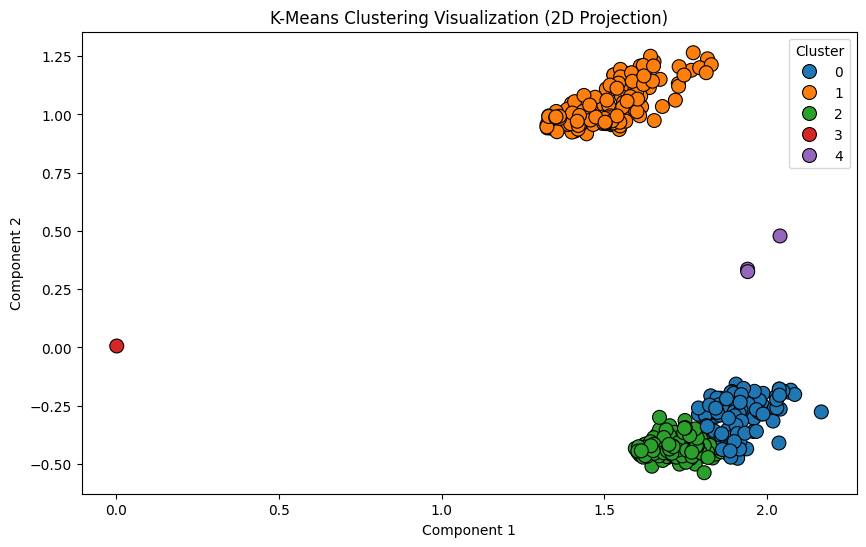

Finished displaying at: 2025-02-19 10:58:09 

Finished executing at: 2025-02-19 10:58:09 



In [79]:
run_k_means(5, documents)

Executing {k} start time: 2025-02-19 10:58:09
K=9: WSS=4211.6228, Silhouette Score=0.0052
Displaying {k} start time: 2025-02-19 10:58:09


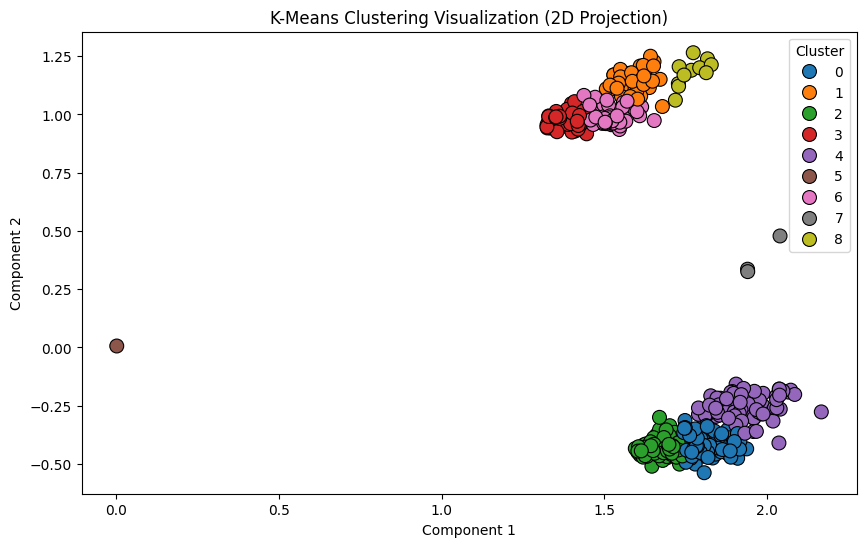

Finished displaying at: 2025-02-19 10:58:10 

Finished executing at: 2025-02-19 10:58:10 



In [80]:
run_k_means(9, documents)

Executing {k} start time: 2025-02-19 10:58:10
K=13: WSS=4221.5986, Silhouette Score=-0.0085
Displaying {k} start time: 2025-02-19 10:58:10


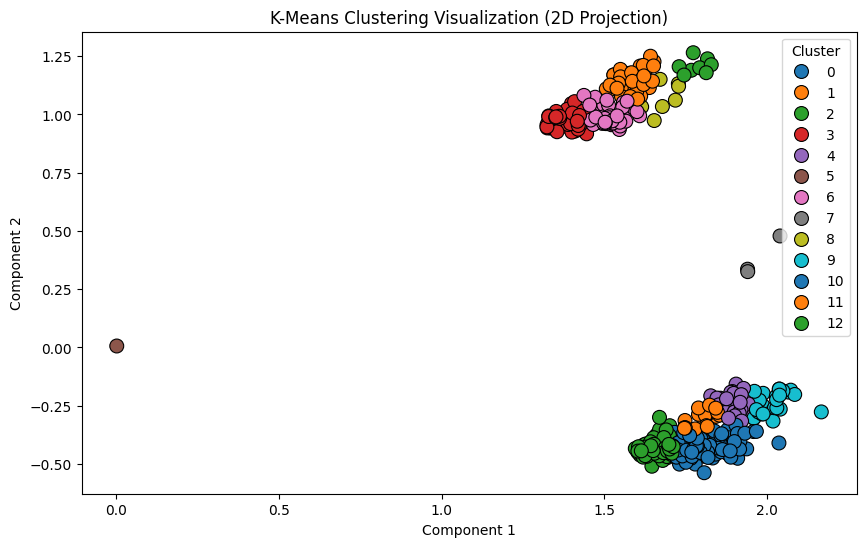

Finished displaying at: 2025-02-19 10:58:10 

Finished executing at: 2025-02-19 10:58:10 



In [81]:
run_k_means(13, documents)